In [2]:
import warnings
import numpy as np
import pandas as pd 


import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt


import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from datetime import datetime


In [4]:
import pandas as pd 
df= pd.read_csv("podlvrydtl.csv")

In [5]:
df.shape

(61207, 9)

In [ ]:
df.head(15)

In [ ]:
df.dtypes

In [ ]:
#select sum(dlvry_qty), year(dlvry_start_Dt) group by year(dlvry_start_Dt) from pod

In [6]:
df['EXTND_DP']=pd.to_datetime(df['EXTND_DP'])
df['DLVRY_END_DT']=pd.to_datetime(df['DLVRY_END_DT'])
df['DLVRY_START_DT']=pd.to_datetime(df['DLVRY_START_DT'])



# To have separate columns for year and month

In [7]:
df['year']= df['DLVRY_START_DT'].dt.year
df['year']
df['month']=df['DLVRY_START_DT'].dt.month
df['month']
df.head(3)

#to drop monthyear field
#df.drop('monthyear', axis=1)

,PO_NO,PL_NO,DLVRY_START_DT,DLVRY_END_DT,DLVRY_QTY,DROP_FLAG,EXTND_DP,RNOTE_QTY,IMMS_PO_SR,year,month
0,B1560135,70011930,2015-12-23,2016-01-30,200.0,Y,2016-01-30,0.0,NaN,2015,12
1,B1560205,72080024,2016-03-14,2016-04-18,500.0,Y,2016-04-18,0.0,NaN,2016,3
2,B1560205,72080085,2016-03-14,2016-04-18,500.0,Y,2016-04-18,0.0,NaN,2016,3


In [ ]:
df.groupby('year')

In [8]:
d = df.groupby(df['DLVRY_START_DT'].dt.year)

In [8]:
d.groups

{2015: Int64Index([    0,  1704,  1705,  1706,  1707,  1708,  1709,  1710,  1711,
              1712,
             ...
             37671, 37672, 37675, 37679, 37689, 37690, 37691, 37848, 37849,
             37850],
            dtype='int64', length=6800),
 2016: Int64Index([    1,     2,     3,  1730,  1731,  1732,  1733,  1734,  1735,
              1736,
             ...
             43165, 43166, 43168, 43172, 43173, 43176, 43178, 43179, 43182,
             43190],
            dtype='int64', length=11572),
 2017: Int64Index([    4,     5,     6,     7,     8,     9,    10,    11,    12,
                13,
             ...
             50160, 50161, 50162, 50163, 50164, 50165, 50166, 50167, 50168,
             50169],
            dtype='int64', length=11650),
 2018: Int64Index([   15,    16,    17,    18,    19,    20,    21,    22,    23,
                24,
             ...
             54738, 54739, 54740, 54741, 54742, 54743, 54744, 54745, 54746,
             54747],
           

In [9]:
df.groupby(df['DLVRY_START_DT'].dt.year)['DLVRY_QTY','IMMS_PO_SR' ].agg(sum)

,DLVRY_QTY,IMMS_PO_SR
DLVRY_START_DT,,
2015,49075603.50,10.0
2016,62031774.88,168.0
2017,60524830.65,1792.0
2018,62841817.33,3529.1
2019,46903627.68,13999.0
2020,51852675.00,24602.0
2021,10216090.39,5298.0
2022,52.00,25.0


In [10]:
d.agg(sum)

,DLVRY_QTY,RNOTE_QTY,IMMS_PO_SR,year,month
DLVRY_START_DT,,,,,
2015,49075603.50,0.0,10.0,13702000,35464
2016,62031774.88,0.0,168.0,23329152,52261
2017,60524830.65,0.0,1792.0,23498050,56104
2018,62841817.33,0.0,3529.1,20956930,47541
2019,46903627.68,0.0,13999.0,21251994,49477
2020,51852675.00,0.0,24602.0,17632580,44933
2021,10216090.39,0.0,5298.0,3116382,2207
2022,52.00,0.0,25.0,6066,3


In [11]:
d['IMMS_PO_SR'].agg(sum)

DLVRY_START_DT
2015       10.0
2016      168.0
2017     1792.0
2018     3529.1
2019    13999.0
2020    24602.0
2021     5298.0
2022       25.0
Name: IMMS_PO_SR, dtype: float64

In [12]:
d['RNOTE_QTY', 'DLVRY_QTY', 'year'].agg(sum)

,RNOTE_QTY,DLVRY_QTY,year
DLVRY_START_DT,,,
2015,0.0,49075603.50,13702000
2016,0.0,62031774.88,23329152
2017,0.0,60524830.65,23498050
2018,0.0,62841817.33,20956930
2019,0.0,46903627.68,21251994
2020,0.0,51852675.00,17632580
2021,0.0,10216090.39,3116382
2022,0.0,52.00,6066


In [13]:
d['DLVRY_QTY'].agg(max)

DLVRY_START_DT
2015    2755000.0
2016    3020000.0
2017    2339000.0
2018    2941000.0
2019    2342000.0
2020    3396650.0
2021     846000.0
2022         20.0
Name: DLVRY_QTY, dtype: float64

In [14]:
df['DLVRY_START_DT'].dt.year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [9]:
d1=df.groupby(df['DLVRY_START_DT'].dt.year)['PO_NO'].count()
df.groupby(df['DLVRY_START_DT'].dt.year)['DLVRY_QTY'].sum()

DLVRY_START_DT
2015    49075603.50
2016    62031774.88
2017    60524830.65
2018    62841817.33
2019    46903627.68
2020    51852675.00
2021    10216090.39
2022          52.00
Name: DLVRY_QTY, dtype: float64

# Year wise POs generated

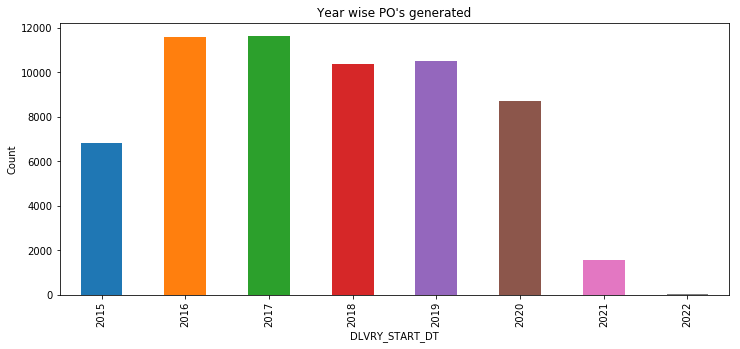

In [10]:
import seaborn as sns
#sns.set(style='darkgrid')
pl.figure(figsize=(12,5))

pl.ylabel("Count")
pl.xlabel("Year")
#d1.plot('bar')
pl.title("Year wise PO's generated")
df.groupby(df['DLVRY_START_DT'].dt.year)['PO_NO'].count().plot('bar')
a=df['DLVRY_START_DT']


# Month wise POs generated

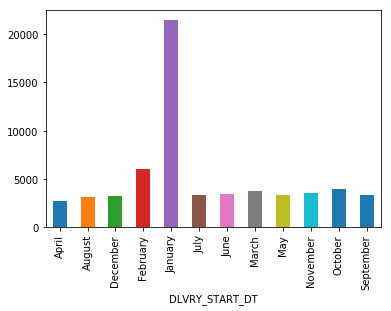

In [22]:
df.groupby(df['DLVRY_START_DT'].dt.strftime('%B'))['PO_NO'].count().plot('bar')


# Year wise sum of delivery Quantity

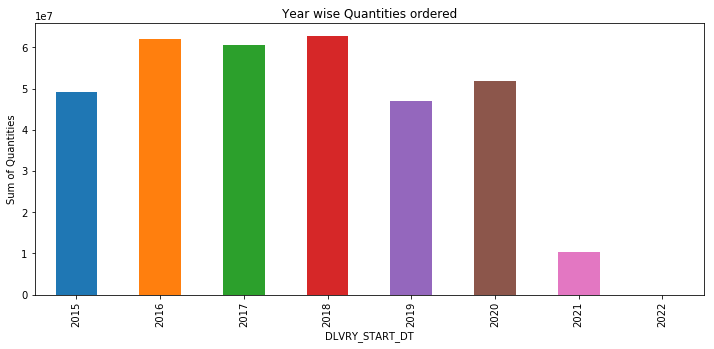

In [11]:
#Year wise sum of delivery quantity

#sns.set(style='darkgrid')
pl.figure(figsize=(12,5))

pl.ylabel("Sum of Quantities")
pl.xlabel("Year")
#d1.plot('bar')
pl.title("Year wise Quantities ordered")
df.groupby(df['DLVRY_START_DT'].dt.year)['DLVRY_QTY'].sum().plot('bar')
#df.groupby(df['DLVRY_START_DT'].dt.year)['DLVRY_QTY'].sum().plot('line')


In [ ]:
#Year wise sum of delivery quantity
#import seaborn as sns
#sns.set(style='darkgrid')
pl.figure(figsize=(12,5))

pl.ylabel("Count of Items ordered")
pl.xlabel("PO Nos")
#d1.plot('bar')
pl.title("Items Ordered PO wise")
df.groupby('PO_NO')['DLVRY_START_DT'].count().plot('bar')

# Creating Data Frames for each year separately

In [ ]:
# creating data frames for each year separately
year2015=df[(df['DLVRY_START_DT'].dt.year)==2015]
year2016=df[(df['DLVRY_START_DT'].dt.year)==2016]
year2017=df[(df['DLVRY_START_DT'].dt.year)==2017]
year2018=df[(df['DLVRY_START_DT'].dt.year)==2018]
year2019=df[(df['DLVRY_START_DT'].dt.year)==2019]
year2020=df[(df['DLVRY_START_DT'].dt.year)==2020]

In [ ]:
y5=year2015.PO_NO.count()

y6=year2016.PO_NO.count()

y6

# Month-wise Year-wise Deliveries Count

In [13]:
year_month = df.groupby([df['DLVRY_START_DT'].dt.year,df['DLVRY_START_DT'].dt.month])
year_month.count()

PO_NO  PL_NO  DLVRY_START_DT  DLVRY_END_DT  \
DLVRY_START_DT DLVRY_START_DT                                               
2015           1                1570   1570            1570          1570   
               2                 893    893             893           893   
               3                 542    542             542           542   
               4                 469    469             469           469   
               5                 432    432             432           432   
               6                 329    329             329           329   
               7                 412    412             412           412   
               8                 369    369             369           369   
               9                 466    466             466           466   
               10                500    500             500           500   
               11                374    374             374           374   
               12                444    444             444           444   
2016           1                4158   4158            4158          4158   
               2                1199   1199            1199          1199   
               3                 603    603             603           603   
               4                 566    566             566           566   
               5                 762    762             762           762   
               6                 790    790             790           790   
               7                 570    570             570           570   
               8                 521    521             521           521   
               9                 666    666             666           666   
               10                653    653             653           653   
               11                608    608             608           608   
               12                476    476             476           476   
2017           1                3849   3849            3849          3849   
               2                 789    789             789           789   
               3                1054   1054            1054          1054   
               4                 679    679             679           679   
               5                 667    667             667           667   
               6                 737    737             737           737   
...                              ...    ...             ...           ...   
2019           8                 505    505             505           505   
               9                 530    530             530           530   
               10                671    671             671           671   
               11                717    717             717           717   
               12                687    687             687           687   
2020           1                2749   2749            2749          2749   
               2                 754    754             754           754   
               3                 550    550             550           550   
               4                 279    279             279           279   
               5                 395    395             395           395   
               6                 531    531             531           531   
               7                 686    686             686           686   
               8                 488    488             488           488   
               9                 533    533             533           533   
               10                711    711             711           711   
               11                500    500             500           500   
               12                553    553             553           553   
2021           1                1392   1392            1392          1392   
               2                  54     54              54            54   
               3           

# Month wise sum of quantity ordered

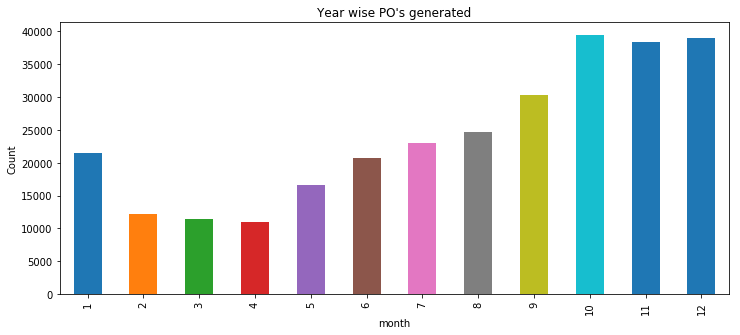

In [15]:
import seaborn as sns
#sns.set(style='darkgrid')
pl.figure(figsize=(12,5))

pl.ylabel("Count")
pl.xlabel("Year")
#d1.plot('bar')
year2015=df[(df['DLVRY_START_DT'].dt.year)==2015]
pl.title("Year wise PO's generated")
mn= year2015.groupby(df['DLVRY_START_DT'].dt.strftime('%B'))
#Series.dt.strftime(*args, **kwargs)
#Date format string (e.g. “%Y-%m-%d”).
#result = sr.dt.strftime('% B % d, % Y, % r') 
#shows like December 31, 2019, 08:45:00 AM
#result = sr.dt.strftime('% d % m % Y, % r')
#shows like Day 1 31 12 2019, 09:45:00 AM

#df.groupby(df['DLVRY_START_DT'].dt.strftime('%B'))['PO_NO'].count().plot('bar')
a=mn.PO_NO.count()
     
#df.groupby(df['month'])['DLVRY_QTY'].sum().plot('bar')
df.groupby(df['month'])['month'].sum().plot('bar')




# To have month names instead of month number

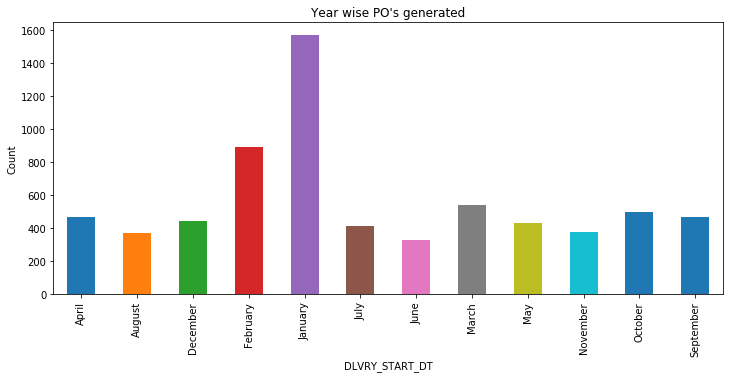

In [16]:
import seaborn as sns
#sns.set(style='darkgrid')
pl.figure(figsize=(12,5))

pl.ylabel("Count")
pl.xlabel("Year")
#d1.plot('bar')
pl.title("Year wise PO's generated")
#%Y , %m , %d 
#on two fields
#df.groupby([df['year'],df['DLVRY_START_DT'].dt.strftime("%B")])['PO_NO'].count()
year2015.groupby(df['DLVRY_START_DT'].dt.strftime('%B'))['PO_NO'].count().plot('bar')



# Grouping on Months (If Month as a separate field)

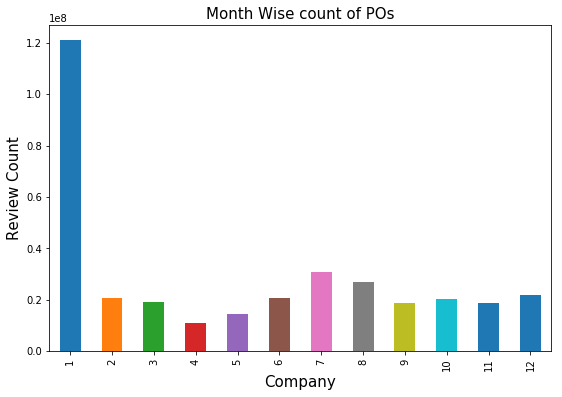

In [17]:
df['month']


#mn=year2015.groupby(['DLVRY_START_DT'].dt.)
mn=year2015.groupby(df['DLVRY_START_DT'].dt.month)
#year2015.groupby(['DLVRY_START_DT'.dt.year])['PO_NO'].size()
a=mn.PO_NO.count()
a
pl.figure(figsize =(25,15))

pl.figure(figsize =(25,15))
pl.ylabel('Review Count', fontsize=15)

b=df.groupby(df['month'])['DLVRY_QTY'].sum().plot('bar')
pl.xlabel('Company', fontsize=15)
pl.title('Month Wise count of POs', fontsize=15)

fig=plt.gcf()
fig.set_size_inches(9,6)


#or
#create new field month


#['DLVRY_QTY'].sum().plot('bar')

In [19]:
df['EXTND_DP'] - df['DLVRY_END_DT']

df['nodelay'] = (df['DLVRY_END_DT'] ==  df['EXTND_DP'])
df['delay'] = (df['EXTND_DP'] - df['DLVRY_END_DT'])


# Monthwise PO placed value

In [33]:
df['delay'] = (df['EXTND_DP'] - df['DLVRY_END_DT']).dt.days.astype('int16')

delayframe=df[df['delay']>0]

#after group by use reset_index() to make it back into a dataframe
grouped1= delayframe.groupby('PO_NO')['delay'].sum().reset_index()
#type(grouped1)
grouped1


,PO_NO,delay
0,BP180390,220
1,BP190305,3
2,BP190342,22
3,BP190355,59
4,BP190364,38
5,BP190374,33
6,BP190387,29
7,BP190413,14
8,BP190415,14
9,BP190416,14


In [38]:
#Pandas Dataframe.rank() method returns a rank of every respective index
#of a series passed. The rank is returned on the basis of position after sorting.
grouped1= grouped1.sort_values('delay', ascending=True)
grouped1["Rank"] = grouped1["delay"].rank(axis=0, method='min')
grouped1[1:50]


,PO_NO,delay,Rank
1205,H1635090,1,1.0
8275,T2020555,1,1.0
4700,T1610128,1,1.0
3606,M2010008,1,1.0
4718,T1610169,1,1.0
5862,T1670507,1,1.0
3538,M1985026,1,1.0
1931,H1755033,1,1.0
7327,T1820407,1,1.0
6810,T1770032,1,1.0


In [ ]:
plt.xlabel("Year")
plt.ylabel("Total")
plt.bar(np.arange(1,13),a )

plt.title('Month Wise PO Placed in Year 2015', fontsize=15)

#plt.xticks(ind + width / 2, ('amazon', 'apple', 'facebook', 'google', 'microsoft', 'netflix'))
#plt.legend(loc='best')

[0 1 2 3 4 5]
[0.3, 1.3, 2.3, 3.3, 4.3, 5.3]


([<matplotlib.axis.XTick at 0x1f2663f1f10>,
 [Text(0.15, 0, 'CSE'),
  Text(1.15, 0, 'ISE'),
  Text(2.15, 0, 'CSE'),
  Text(3.15, 0, 'EEE'),
  Text(4.15, 0, 'MECH'),
  Text(5.15, 0, 'EIC')])

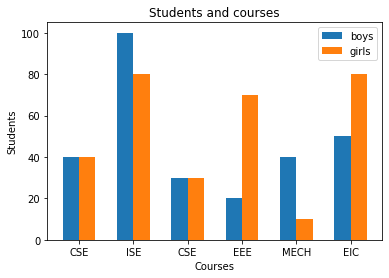

In [4]:
import numpy as np
w=0.3
x=["CSE", "ISE", "CSE", "EEE", "MECH", "EIC"]
boys=[40,100,30,20,40,50]
girls=[40,80,30,70,10,80]

bar1=np.arange(len(x))
print(bar1)
bar2=[i+w for i in bar1]
print(bar2)
plt.bar(bar1,boys,w,label="boys")
plt.bar(bar2,girls, w, label="girls")
plt.xlabel("Courses")
plt.ylabel("Students")
plt.title("Students and courses")
plt.legend()
plt.xticks(bar1 + w/2,x)


([<matplotlib.axis.XTick at 0x1f266474820>,
 [Text(0.2, 0, 'USA'),
  Text(1.2, 0, 'RUSSIA'),
  Text(2.2, 0, 'GERMANY'),
  Text(3.2, 0, 'CHINA'),
  Text(4.2, 0, 'GHANA')])

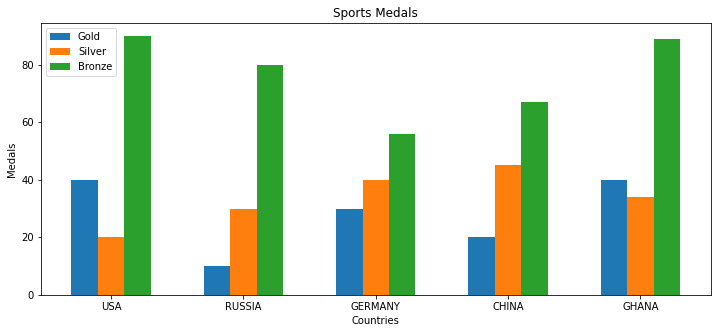

In [5]:
w=0.2
x=["USA", "RUSSIA", "GERMANY", "CHINA", "GHANA"]
gold=[40,10,30,20,40]
silver=[20,30,40,45,34]
bronze=[90,80,56,67,89]

plt.figure(figsize=(12,5))

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]

plt.bar(bar1,gold,w, label="Gold")
plt.bar(bar2,silver, w, label="Silver")
plt.bar(bar3,bronze, w, label="Bronze")
plt.xlabel("Countries")
plt.ylabel("Medals")
plt.title("Sports Medals")
plt.legend()

plt.xticks(bar1 + w,x)



# Making bar graphs - multiple

([<matplotlib.axis.XTick at 0x1f2664fb730>,
 [Text(0.2, 0, 'CSE'),
  Text(1.2, 0, 'ISE'),
  Text(2.2, 0, 'CSE'),
  Text(3.2, 0, 'EEE'),
  Text(4.2, 0, 'MECH'),
  Text(5.2, 0, 'EIC')])

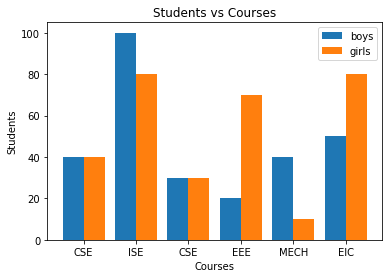

In [6]:
w=0.4
x=["CSE", "ISE", "CSE", "EEE", "MECH", "EIC"]
boys=[40,100,30,20,40,50]
girls=[40,80,30,70,10,80]

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]

plt.bar(bar1, boys, w , label="boys")
plt.bar(bar2, girls, w , label="girls")

plt.xlabel("Courses")
plt.ylabel("Students")
plt.title("Students vs Courses")
plt.legend()
plt.xticks(bar1,x)

#to have it in the centre of two bars
plt.xticks(bar1+w/2,x)


([<matplotlib.axis.XTick at 0x1f266576310>,
 [Text(0.2, 0, 'USA'),
  Text(1.2, 0, 'RUSSIA'),
  Text(2.2, 0, 'GERMANY'),
  Text(3.2, 0, 'CHINA'),
  Text(4.2, 0, 'GHANA')])

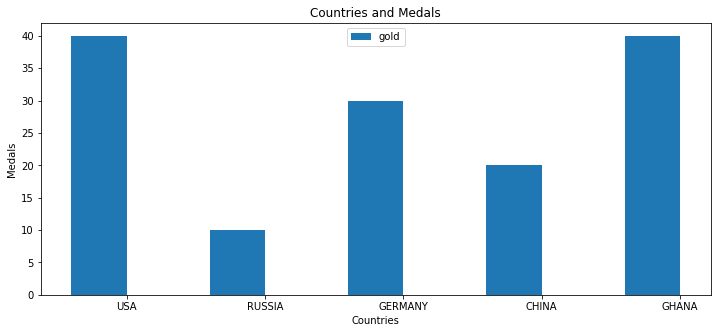

In [7]:
w=0.4
x=["USA", "RUSSIA", "GERMANY", "CHINA", "GHANA"]
gold=[40,10,30,20,40]
pl.figure(figsize=(12,5))

bar1=np.arange(len(x))


plt.bar(bar1, gold, w , label="gold")

plt.xlabel("Countries")
plt.ylabel("Medals")
plt.title("Countries and Medals")
plt.legend()
plt.xticks(bar1,x)

#to have it in the centre of two bars
plt.xticks(bar1+w/2,x)

# Calculating the delay and no delay in shipping

In [ ]:
df['nodelay']=df['DLVRY_END_DT'] ==df['EXTND_DP']
#df['nodelay']=='False'
#d=(df['nodelay'] == FALSE)
#df['delay']=df[d]
df['delay']=(df['EXTND_DP'] - df['DLVRY_END_DT'])


df['delay']
#df.groupby('PO_NO').agg(sum)

#eg   df['tdColumn'] = df['tdColumn'].dt.days.astype('int16')

# Finding delay sum vendor wise and sorting

In [ ]:
df['delay']=(df['EXTND_DP'] - df['DLVRY_END_DT']).dt.days.astype('int16')

df['delay']

#df[df['delay'] == 0]
#delayframe=df[df['delay'] > 0]


#Do your groupby, and use reset_index() to make it back into a DataFrame. Then sort.
#actually PO_NO wll be replaced by vendor code
grouped1= delayframe.groupby('PO_NO')['delay'].sum().reset_index()

#Do your groupby, and use reset_index() to make it back into a DataFrame. Then sort.

grouped1=grouped1.sort_values('delay', ascending=True)


# Giving ranks using min (starts with 1)

In [ ]:

#grouped1["Rank"] = grouped1["delay"].rank(method ='average')

grouped1["Rank"] = grouped1["delay"].rank(method ='min')

grouped1

# Making multiple bar graphs

([<matplotlib.axis.XTick at 0x21840159080>,
 <a list of 5 Text xticklabel objects>)

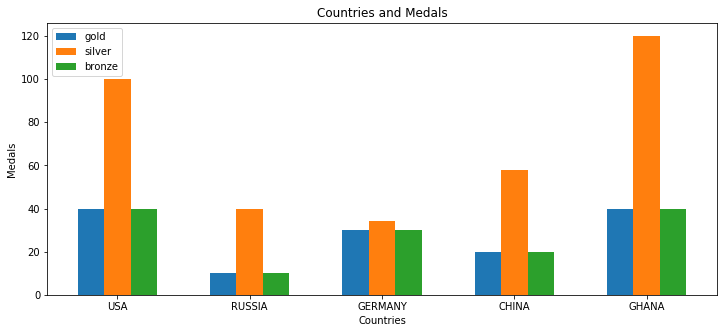

In [4]:
w=0.2
x=["USA", "RUSSIA", "GERMANY", "CHINA", "GHANA"]
gold=[40,10,30,20,40]
silver=[100,40,34,58,120]
bronze=[200,100,250,120,90]

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]
pl.figure(figsize=(12,5))
plt.bar(bar1, gold, w , label="gold")
plt.bar(bar2, silver, w , label="silver")
plt.bar(bar3, gold, w , label="bronze")

plt.xlabel("Countries")
plt.ylabel("Medals")
plt.title("Countries and Medals")
plt.legend()
plt.xticks(bar1,x)

#to have it in the centre of two bars
plt.xticks(bar1+w,x)

# concatenating data frames

In [8]:
df_1 = pd.DataFrame(
[['Somu', 68, 84, 78, 96],
['Kiku', 74, 56, 88, 85],
['Ajit', 77, 73, 82, 87]],
columns=['name', 'physics', 'chemistry','algebra','calculus'])

df_2 = pd.DataFrame(
[['Amol', 72, 67, 91, 83],
['Lini', 78, 69, 87, 92]],
columns=['name', 'physics', 'chemistry','algebra','calculus'])	

frames = [df_1, df_2]

#concatenate dataframes
df = pd.concat(frames)
df


,name,physics,chemistry,algebra,calculus
0,Somu,68,84,78,96
1,Kiku,74,56,88,85
2,Ajit,77,73,82,87
0,Amol,72,67,91,83
1,Lini,78,69,87,92


In [9]:
df.isnull().sum()

name         0
physics      0
chemistry    0
algebra      0
calculus     0
dtype: int64

In [10]:
df.iloc[2,2]=None
df.iloc[3,3]=None
df

,name,physics,chemistry,algebra,calculus
0,Somu,68,84.0,78.0,96
1,Kiku,74,56.0,88.0,85
2,Ajit,77,NaN,82.0,87
0,Amol,72,67.0,NaN,83
1,Lini,78,69.0,87.0,92


In [11]:

avg = df['chemistry']
avg1=df['algebra']
#impute the mis

avg = avg.mean()
avg1=avg1.mean()
#revenue.fillna(revenue_mean, inplace=True)
avg

df['chemistry'].fillna(avg,inplace=True)
df['algebra'].fillna(avg1,inplace=True)

df

,name,physics,chemistry,algebra,calculus
0,Somu,68,84.0,78.00,96
1,Kiku,74,56.0,88.00,85
2,Ajit,77,69.0,82.00,87
0,Amol,72,67.0,83.75,83
1,Lini,78,69.0,87.00,92


In [ ]:
missing_val_colwise = (df.isnull().sum())
print(missing_val_colwise[missing_val_colwise > 0])


# concatening with different columns in two data frames

In [12]:
#concatenating with different columns
#Nan will be inserted in columns which are not existing


df_1 = pd.DataFrame([['Somu', 68, 84, 78, 96],
                     ['Kiku', 74, 56, 88, 85],
                     ['Ajit', 77, 73, 82, 87]],
                    columns=['name', 'physics', 'chemistry','algebra','calculus'])

df_2 = pd.DataFrame(
[['Amol', 72, 67, 91, 83],
['Lini', 78, 69, 87, 92]],
columns=['name', 'physics', 'chemistry','geometry','calculus'])	

frames = [df_1, df_2]

#concatenate dataframes
df = pd.concat(frames)

#print dataframe
print("df_1\n------\n",df_1)
print("\ndf_2\n------\n",df_2)
print("\ndf\n--------\n",df)

df_1
------
    name  physics  chemistry  algebra  calculus
0  Somu       68         84       78        96
1  Kiku       74         56       88        85
2  Ajit       77         73       82        87

df_2
------
    name  physics  chemistry  geometry  calculus
0  Amol       72         67        91        83
1  Lini       78         69        87        92

df
--------
    name  physics  chemistry  algebra  calculus  geometry
0  Somu       68         84     78.0        96       NaN
1  Kiku       74         56     88.0        85       NaN
2  Ajit       77         73     82.0        87       NaN
0  Amol       72         67      NaN        83      91.0
1  Lini       78         69      NaN        92      87.0


# Combine multiple csv files having same structure

In [7]:
import os
import glob
import pandas as pd
os.chdir("c:/users/admin/concat")

In [8]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
all_filenames

['combined_csv.csv', 'sales1.csv', 'sales2.csv', 'sales3.csv']

all_filenames

In [13]:
a=[]
for file in all_filenames:
    a.append(pd.read_csv(file))
pd.concat(a)

NameError: name 'all_filenames' is not defined

In [ ]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [ ]:
df1=pd.read_csv("combined_csv.csv")

# Another way

In [ ]:
missing_val_colwise = (df1.isnull().sum())
print(missing_val_colwise)
print("\n\n\n")
print(missing_val_colwise[missing_val_colwise > 0])


In [ ]:
data_without_missing_values = df1.dropna(axis=1)


In [ ]:
data_without_missing_values

In [ ]:
df
df.iloc[2,2]=None
df

In [ ]:
df
data_without_missing_values = df.dropna(axis=1)

data_without_missing_values


In [ ]:

To drop the same columns in two DataFrames. 
cols_with_missing = [col for col in original_data.columns 
                                 if original_data[col].isnull().any()]
data1 = original_data.drop(cols_with_missing, axis=1)
data2 = test_data.drop(cols_with_missing, axis=1)


In [ ]:
temp_df.drop_duplicates(inplace=True)

In [ ]:
#Example
#Let's say we want all movies that were released between 2005 and 2010, have a rating above 8.0, 
but made below the 25th percentile in revenue.
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]